# Análisis Exploratorio de Costos de Seguros Médicos de Estados Unidos

Este proyecto tiene como objetivo principal realizar un **Análisis Exploratorio de Datos (EDA)** sobre un conjunto de datos de costos de seguros médicos en EE. UU.

El análisis busca identificar qué variables demográficas y de estilo de vida tienen el **mayor impacto en los cargos (charges)** de seguros, simulando el rol de un analista de datos para una aseguradora.

## Metas del Proyecto

El alcance (scope) se limita a responder las siguientes preguntas clave:

1.  **Impacto del Tabaquismo:** ¿Cuál es la diferencia promedio en costos entre fumadores y no fumadores?
2.  **Edad vs. Costo:** ¿Cómo se relaciona la edad con el aumento de los costos médicos?
3.  **BMI y Factores de Riesgo:** ¿Existe una interacción entre un alto Índice de Masa Corporal (BMI) y el hábito de fumar que impulse los costos?
4.  **Distribución Geográfica:** ¿Existen disparidades significativas en los costos promedio entre las cuatro regiones (Northeast, Southeast, Southwest, Northwest)?

---

## Configuración, Importación de Librerías y Carga de Datos

Usaremos las librerías pandas, numpy y matplotlib para la manipulación, análisis y visualización de los datos.

In [72]:
import pandas as pd             # Manipulación y análisis de datos
import numpy as np              # Operaciones numéricas
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns

# Análisis Inicial del Dataset

Esta sección confirma la estructura del dataset, verifica los tipos de datos y asegura que no existan valores faltantes que requieran imputación, garantizando que el conjunto de datos esté "limpio" y listo para el análisis estadístico.

In [73]:
df = pd.read_csv(r'G:\PyCharm\Análisis Exploratorio de Costos de Seguros Médicos de Estados Unidos\Dataset\insurance.csv')

## Análisis Detallado de Distribución

Conclusión de la Limpieza: El dataset está completo, sin valores nulos ni tipos de datos incorrectos. Se observa que el cargo promedio (charges) es de aproximadamente 13,270 USD, y que las variables categóricas (sex, smoker, region) no requieren codificación adicional para la fase de análisis descriptivo.

In [74]:
charges_mean = df['charges'].mean()
charges_std = df['charges'].std()
charges_median = df['charges'].median()
print(f"Para los cargos al seguro medico estado unidense, el promedio es de {charges_mean:.2f}$, con una mediana de {charges_median:.2f}$ y con una desviación estandar de {charges_std:.2f}$")

Para los cargos al seguro medico estado unidense, el promedio es de 13270.42$, con una mediana de 9382.03$ y con una desviación estandar de 12110.01$


Axes(0.125,0.11;0.775x0.77)


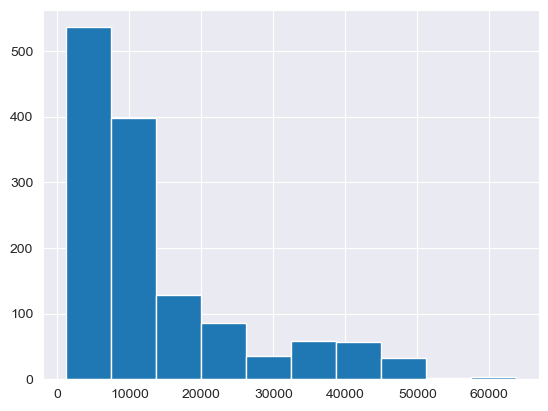

In [75]:
print(df['charges'].hist())

In [76]:
age_mean = df['age'].mean()
age_std = df['age'].std()
age_median = df['age'].median()
print(f"El conjunto de los datos de edad, arrojan que la edad promedio es de {age_mean:.2f} años, a igual que la mediana es de {age_median} años una desviación estandar de {age_std:.2f} años")

El conjunto de los datos de edad, arrojan que la edad promedio es de 39.21 años, a igual que la mediana es de 39.0 años una desviación estandar de 14.05 años


Axes(0.125,0.11;0.775x0.77)


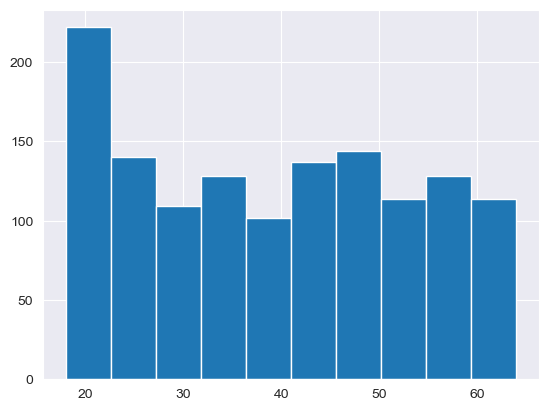

In [77]:
print(df['age'].hist())

In [78]:
bmi_mean = df['bmi'].mean()
bmi_std = df['bmi'].std()
bmi_median = df['bmi'].median()
print(f"El conjunto de los datos de bmi, arrojan que el bmi promedio es de {bmi_mean:.2f} kg/m*m, a igual que la mediana es de {bmi_median} kg/m*m una desviación estandar de {bmi_std:.2f} kg/m*m")

El conjunto de los datos de bmi, arrojan que el bmi promedio es de 30.66 kg/m*m, a igual que la mediana es de 30.4 kg/m*m una desviación estandar de 6.10 kg/m*m


Axes(0.125,0.11;0.775x0.77)


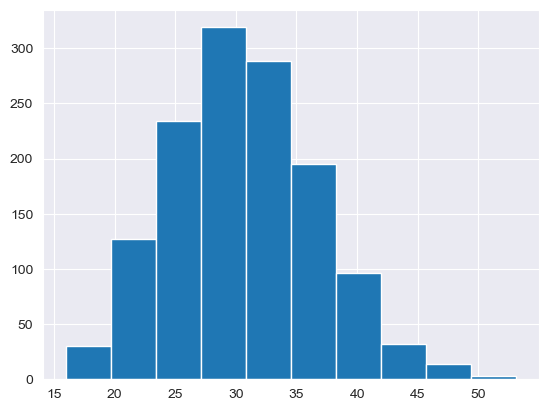

In [79]:
print(df['bmi'].hist())

Después de revisar las variables numéricas y guardar los datos que nos podrian ser utiles para otras pruebas, podemos empezar a revisar nuestras variables categoricas, la edad, el género y los fumadores.

In [80]:
sex = df['sex'].value_counts()
print(sex)

sex
male      676
female    662
Name: count, dtype: int64


In [81]:
smokers = df['smoker'].value_counts()
print(smokers)

smoker
no     1064
yes     274
Name: count, dtype: int64


In [82]:
smoker = smokers.loc['yes']
col_smoker = len(df['smoker'])
smokers_rate = (smoker/col_smoker) * 100
print(f"Un {smokers_rate:.1f}% de las personas son fumadores")

Un 20.5% de las personas son fumadores


In [83]:
regions = df['region'].value_counts()
print(regions)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## Conclusiones del Análisis Exploratorio Inicial

### Observaciones sobre Variables Categóricas

* **Género:** Tenemos una distribución bastante equitativa entre ambos generos, ambos generos representados en un 50% aproximadamente.
* **Fumadores:** El dataset está desbalanceado, con una mayoría significativa de no fumadores donde hay un 20.5% de fumadores.
* **Regiones:** La distribución geográfica es bastante equitativa entre las 4 regiones, lo que sugiere que la muestra es representativa geográficamente.

### Observaciones sobre Variables Numéricas

* **Edad:** La distribución es bastante uniforme en todos los rangos de edad, aunque se observa un pico significativo en el grupo de adultos jóvenes (18-19 años). La media (39.2) y la mediana (39.0) son casi idénticas, lo que indica una distribución simétrica sin sesgos importantes.

* **BMI (Índice de Masa Corporal):** Los datos siguen una **distribución normal (forma de campana)**. El promedio (30.66) y la mediana (30.40) son extremadamente cercanos. Esto facilita el análisis estadístico.

* **Cargos (Charges):** Como se predijo, esta es la variable más crítica. Muestra un **fuerte sesgo positivo (hacia la derecha)**.
    * La mayoría de los cargos se concentran por debajo de los 10,000 USD.
    * Existe una "cola larga" de valores altos que llega hasta los 63,000 USD.
    * La gran diferencia entre el promedio (13,270) y la Mediana (9,382) confirma que hay un grupo pequeño de pacientes con costos extremadamente altos que inflan el promedio.

---

# Análisis de Factores de Costo

Habiendo confirmado la integridad y calidad de los datos, en esta fase nos centraremos en responder las preguntas clave del negocio definidas en el alcance del proyecto.

Utilizaremos visualizaciones y cálculos estadísticos para determinar cómo las variables de estilo de vida (fumar, BMI) y demográficas (edad, región) impactan en la facturación de los seguros médicos.

El análisis se dividirá en las siguientes interrogantes:
1.  **Tabaquismo:** El impacto financiero del hábito de fumar.
2.  **Edad:** La progresión de costos a lo largo de la vida.
3.  **Salud (BMI):** La correlación entre obesidad y costos.
4.  **Geografía:** Disparidades regionales.

## Impacto del Tabaquismo en los Costos

In [84]:
relacion1 = ['smoker', 'charges']
df_relacion1 = df[relacion1]

In [85]:
relacion1_ord = df_relacion1.sort_values(by='smoker')

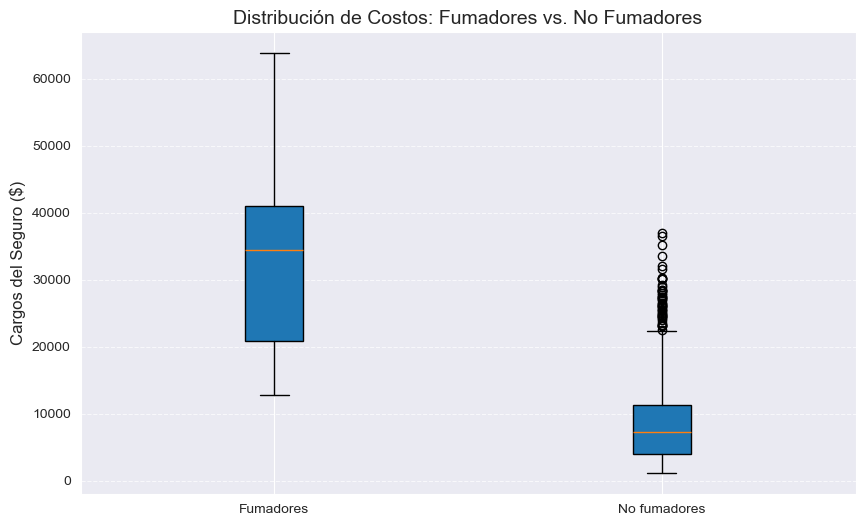

In [86]:
fumadores = df[df['smoker'] == 'yes']['charges']
no_fumadores = df[df['smoker'] == 'no']['charges']

plt.figure(figsize=(10, 6))
etiquetas_boxplot = ['Fumadores','No fumadores']
datos_fumadores = [fumadores, no_fumadores]

plt.boxplot(datos_fumadores, tick_labels=etiquetas_boxplot, patch_artist=True)

plt.title('Distribución de Costos: Fumadores vs. No Fumadores', fontsize=14)
plt.ylabel('Cargos del Seguro ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig('../03_Reports_Visualizations/01_Tabaquismo_Boxplot.png')
plt.show()

In [87]:
promFum = sum(fumadores)/len(fumadores)
print(f"El costo promedio para las personas que fuman es de {promFum:.2f} USD")
promNoFum = sum(no_fumadores)/len(no_fumadores)
print(f"En cambio el promedio para no fumadores es de {promNoFum:.2f} USD")

El costo promedio para las personas que fuman es de 32050.23 USD
En cambio el promedio para no fumadores es de 8434.27 USD


## Conclusión: El Costo Estratégico del Tabaquismo

Este análisis podemos observar el factor de riesgo más significativo para el costo del seguro:

1.  **Disparidad de Costos:** El costo promedio para los **fumadores (32,050 USD)** es casi **cuatro veces mayor** que el costo promedio para los no fumadores **($8,434 USD)**.
2.  **Riesgo e Incertidumbre:** El **boxplot** muestra que los costos para los fumadores no solo son más altos, sino que también tienen una distribución mucho más dispersa, lo que indica un **riesgo de reclamos volátiles y muy costosos**.
---

## Impacto de la Edad sobre los Costos

In [100]:
AgeCharges = df[['age','charges']]
EdadCargos_ord = AgeCharges.sort_values(by='age')

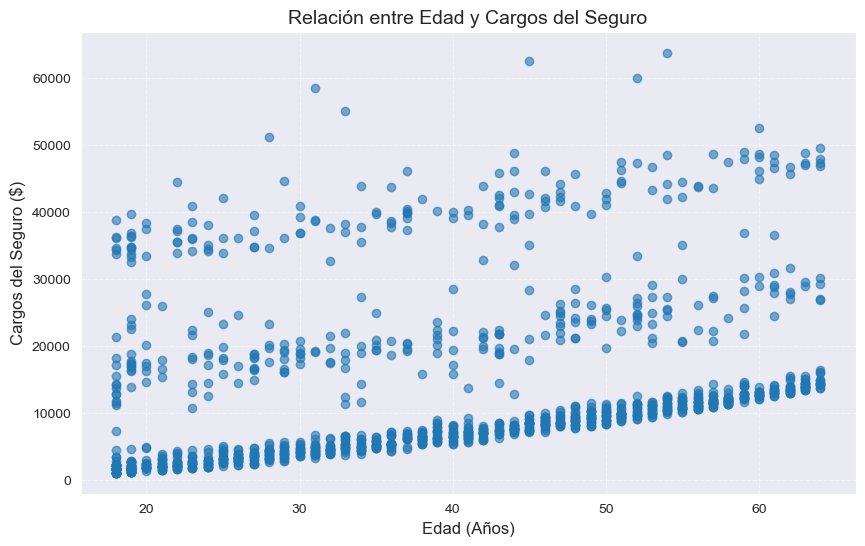

In [89]:
x = EdadCargos_ord['charges']
y = EdadCargos_ord['age']

# Configuración del Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(x=df['age'], y=df['charges'], alpha=0.6)

# Añadir títulos
plt.title('Relación entre Edad y Cargos del Seguro', fontsize=14)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Cargos del Seguro ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Se puede observar que hay 3 grupos distintos en los costos, por lo que debe existir por lo menos 1 variable que segmente los costos.

### Hipotesis
Se ha determinado que el hábito de fumar uno de los **mayores determinantes** del costo y justificaria la diferencia en la segmentación de precios. Para confirmar:


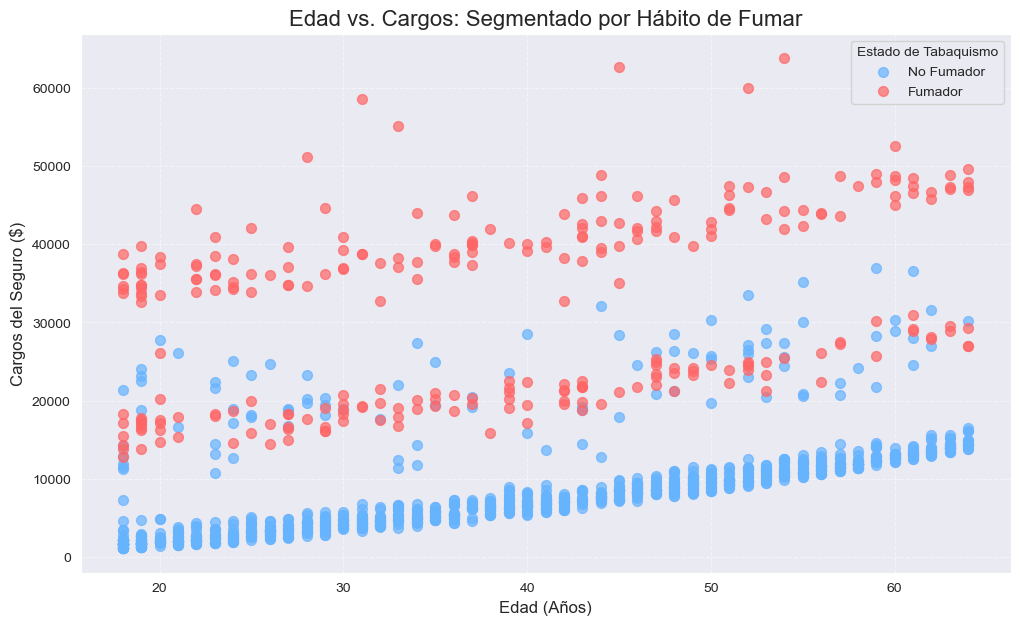

In [90]:
fumadores_df = df[df['smoker'] == 'yes']
no_fumadores_df = df[df['smoker'] == 'no']

plt.figure(figsize=(12, 7))

plt.scatter(
    no_fumadores_df['age'],
    no_fumadores_df['charges'],
    label='No Fumador',
    color='#66b3ff', # Azul
    alpha=0.7,
    s=50 # Tamaño del punto
)

plt.scatter(
    fumadores_df['age'],
    fumadores_df['charges'],
    label='Fumador',
    color='#ff6666', # Rojo
    alpha=0.7,
    s=50
)

plt.title('Edad vs. Cargos: Segmentado por Hábito de Fumar', fontsize=16)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Cargos del Seguro ($)', fontsize=12)
plt.legend(title='Estado de Tabaquismo')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('../03_Reports_Visualizations/02_Edad_vs_Cargos.png')
plt.show()

### Hallazgo: El Factor de Riesgo Dominante

El gráfico que segmenta los datos por la variable `smoker` confirma la hipótesis planteada en el análisis de Edad:

1.  **Segmentación Definida:** Las tres bandas de costos observadas en el *scatter plot* inicial están completamente definidas por el estado de fumador.
2.  **Tendencia:** En **todos los grupos**, la tendencia es la misma: **los costos aumentan linealmente con la edad**. La edad no cambia la relación, simplemente la desplaza verticalmente a un costo base mucho mayor para los fumadores.
3.  **Conclusión:** La edad actúa como un multiplicador de riesgo, pero el **hábito de fumar es el mayor contribuyente** a los costos más altos. Aun cuando los fumadores pueden representar mayores ganancias a la aseguradora, también implican un riesgo.

# Correlación IMC (BMI) vs. Cargos.

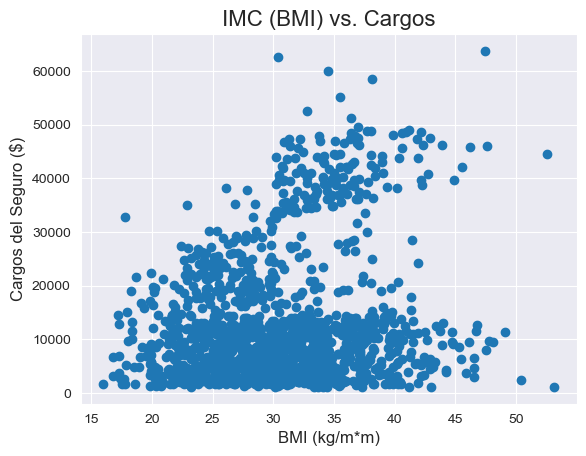

In [91]:
imc = df['bmi']
cargos = df['charges']

plt.scatter(x=imc,y=cargos)
plt.title('IMC (BMI) vs. Cargos', fontsize=16)
plt.xlabel('BMI (kg/m*m)', fontsize=12)
plt.ylabel('Cargos del Seguro ($)', fontsize=12)

plt.show()

Aparenteménte no existe una correlación directa entre el índice de masa corporal (IMC/BMI) y los cargos de seguro médico. Sin embargo, se pueden ver un grupo que se separa del cumulo más grande, probablemente está relacionado con algúna otra variable. Sabiendo que el fumar es un factor relevante a los cargos sobre los precios, añadiremos una 3 dimención, que seran los fumadores, buscando identificar algún tipo de relación.

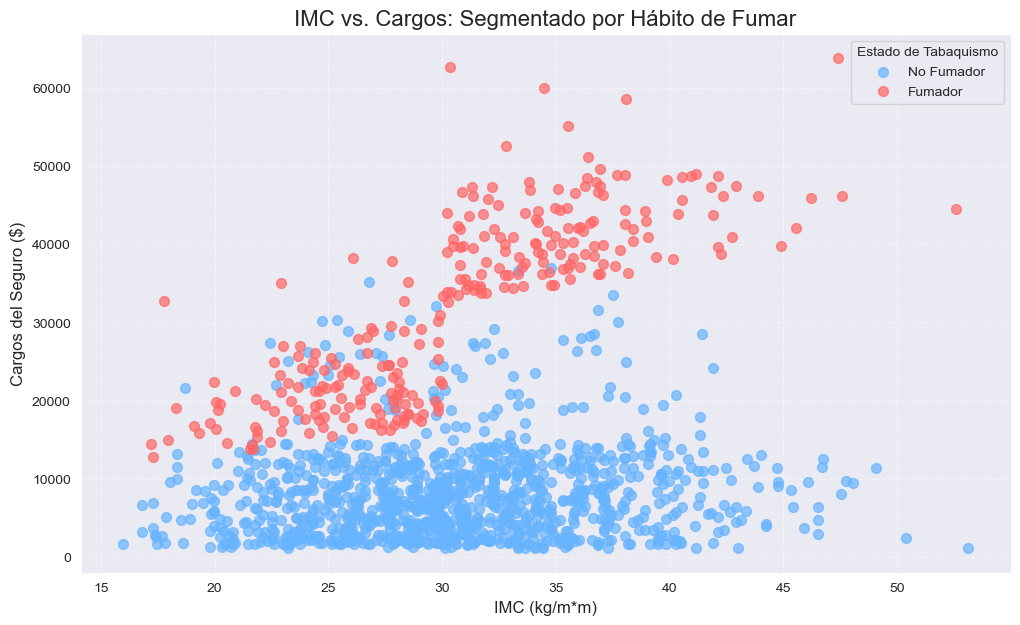

In [92]:
fumadores_df = df[df['smoker'] == 'yes']
no_fumadores_df = df[df['smoker'] == 'no']

plt.figure(figsize=(12, 7))

plt.scatter(
    no_fumadores_df['bmi'],
    no_fumadores_df['charges'],
    label='No Fumador',
    color='#66b3ff', # Azul
    alpha=0.7,
    s=50 # Tamaño del punto
)

plt.scatter(
    fumadores_df['bmi'],
    fumadores_df['charges'],
    label='Fumador',
    color='#ff6666', # Rojo
    alpha=0.7,
    s=50
)

plt.title('IMC vs. Cargos: Segmentado por Hábito de Fumar', fontsize=16)
plt.xlabel('IMC (kg/m*m)', fontsize=12)
plt.ylabel('Cargos del Seguro ($)', fontsize=12)
plt.legend(title='Estado de Tabaquismo')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('../Visualizaciones/04_IMC(BMI)_vs._Cargos_scatterplot.png')
plt.show()

La suposición es correcta, el grupo que se separa del cumulo principal son los fumadores. Sin embargo, el grupo de no fumadores no muestra ninguna relación entre su índice de masa corporal y los cargos, al contrario que si lo hace el grupo de fumadores. Es notable que a partír de un índice de masa corporal de 30 años en adelante los cargos para el seguro médico del individuo son del doble, que podria ser un factor de riesgo para la aseguradora.

## Análisis Regional

Ahora analizaremos nuestra última pregunta: ¿Existen disparidades significativas en los costos promedio entre las cuatro regiones (Northeast, Southeast, Southwest, Northwest)?

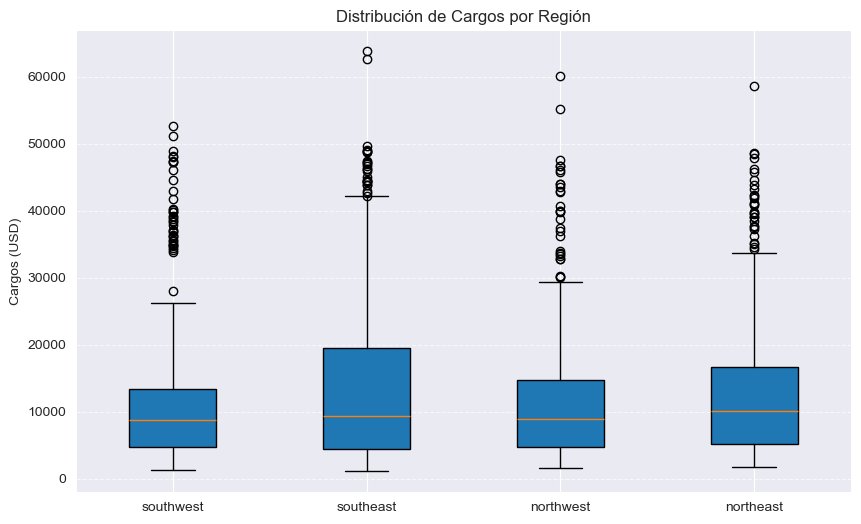

In [93]:
df_regiones = df[['region','charges']]
SurOeste = df_regiones[df_regiones['region'] == 'southwest']
SurEste = df_regiones[df_regiones['region'] == 'southeast']
NorOeste = df_regiones[df_regiones['region'] == 'northwest']
NorEste = df_regiones[df_regiones['region'] == 'northeast']

datos_region = [SurOeste['charges'],SurEste['charges'],NorOeste['charges'],NorEste['charges']]
etiquetas = ['southwest','southeast','northwest','northeast']

plt.figure(figsize=(10, 6)) # Opcional: hace la gráfica más grande
plt.boxplot(datos_region, tick_labels=etiquetas, patch_artist=True)

plt.title('Distribución de Cargos por Región')
plt.ylabel('Cargos (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('../Visualizaciones/05_Distribución_Cargos_Región_boxplot.png')
plt.show()

In [94]:
promSurOeste = SurOeste['charges'].mean()
medianaSurOeste = SurOeste['charges'].median()

promSurEste = SurEste['charges'].mean()
medianaSurEste = SurEste['charges'].median()

promNorOeste = NorOeste['charges'].mean()
medianaNorOeste = NorOeste['charges'].median()

promNorEste = NorEste['charges'].mean()
medianaNorEste = NorEste['charges'].median()

print(f"""
El coste del seguro medico en la region suroeste tiene un promedio ${promSurOeste:.2f}, y una mediana de ${medianaSurOeste:.2f}, siendo la region mas barata junto a la región noroeste con un cargo promedio de ${promNorOeste:.2f} y una mediana ${medianaNorOeste:.2f}. Por otro lado las regiones del este son mas caras, empezando por la región noreste que tiene un promedio de ${promNorEste:.2f} y una mediana de ${medianaNorEste:.2f}, siendo la segunda mas cara, solo superada por la region sureste. La región sureste tiene un promedio de ${promSurEste:.2f} y una mediana de ${medianaSurEste:.2f} en seguros medicos""")


El coste del seguro medico en la region suroeste tiene un promedio $12346.94, y una mediana de $8798.59, siendo la region mas barata junto a la región noroeste con un cargo promedio de $12417.58 y una mediana $8965.80. Por otro lado las regiones del este son mas caras, empezando por la región noreste que tiene un promedio de $13406.38 y una mediana de $10057.65, siendo la segunda mas cara, solo superada por la region sureste. La región sureste tiene un promedio de $14735.41 y una mediana de $9294.13 en seguros medicos


Podemos notar que las regiones del este tienen en promedio cargos en su seguro médico más altos, por lo que plantearse las siguientes preguntas, podria ayudar a la aseguradora a evitar riesgos y aprovechar oportunidades:

* ¿Qué factores hacen que las regiones del este tengan mayores cargos en su seguro médico?
* Con la información disponible, ¿Se puéden conocer las causas de los aumentos en cargos médicos por región?
* ¿Qué otros factores fuera de nuestros datos actuales deberiamos tomar en cuenta?

### Descomposición del Costo Regional

Uno de los mayores factores al aumento a los cargos medicos es si el individuo es fumador, por lo que haces un análisis regional buscando la concentración de personas fumadoras por region podria dar claridad a las diferencias en los cargos por región.

In [95]:
proporcion_fumadores = df.groupby('region')['smoker'].value_counts(normalize=True) * 100
print("--- Proporción de Fumadores (%) por Región ---")
print(proporcion_fumadores.loc[:, 'yes'].sort_values(ascending=False))

--- Proporción de Fumadores (%) por Región ---
region
southeast    25.000000
northeast    20.679012
northwest    17.846154
southwest    17.846154
Name: proportion, dtype: float64


In [96]:
# Calcular el BMI promedio por región
bmi_promedio = df.groupby('region')['bmi'].mean().sort_values(ascending=False)
print("\n--- BMI Promedio por Región ---")
print(bmi_promedio)


--- BMI Promedio por Región ---
region
southeast    33.355989
southwest    30.596615
northwest    29.199785
northeast    29.173503
Name: bmi, dtype: float64


In [97]:
fumadores_df = df[df['smoker'] == 'yes']

correlacion_bmi_smoker = fumadores_df['bmi'].corr(fumadores_df['charges'])

print("--- Correlación entre BMI y Cargos (Solo Fumadores) ---")
print(f"Correlación (R): {correlacion_bmi_smoker:.2f}")

no_fumadores_df = df[df['smoker'] == 'no']
correlacion_bmi_nonsmoker = no_fumadores_df['bmi'].corr(no_fumadores_df['charges'])
print(f"Correlación (R): {correlacion_bmi_nonsmoker:.2f} (No Fumadores)")

--- Correlación entre BMI y Cargos (Solo Fumadores) ---
Correlación (R): 0.81
Correlación (R): 0.08 (No Fumadores)


### Disparidades Geográficas de Costos

El análisis de la distribución de cargos por región revela diferencias notables en la estructura de costos de los seguros en EE. UU.

1.  **Región más cara:** El **Sureste (Southeast)** presenta la mediana de cargos más alta y es la región con la mayor dispersión de costos, lo que sugiere que enfrenta los mayores riesgos y la prima promedio más alta.
2.  **Regiones más baratas:** El **Noroeste (Northwest)** y **Suroeste (Southwest)** tienen estructuras de costos muy similares, con las medianas más bajas y menor volatilidad, a pesar de su gran tamaño geográfico.
3.  **Implicación de Negocio:** La aseguradora debería analizar qué factores específicos del Sureste (posiblemente una mayor concentración de fumadores, BMI más alto o políticas médicas locales) están impulsando estos costos para justificar o ajustar sus tarifas regionales.

## Número de Hijos vs. Cargos

Ahora indagaremos en una de las variables que hemos omitido, el número de hijos o más especificamente, la relación que hay entre el número de hijos con los cargos de seguro médico.

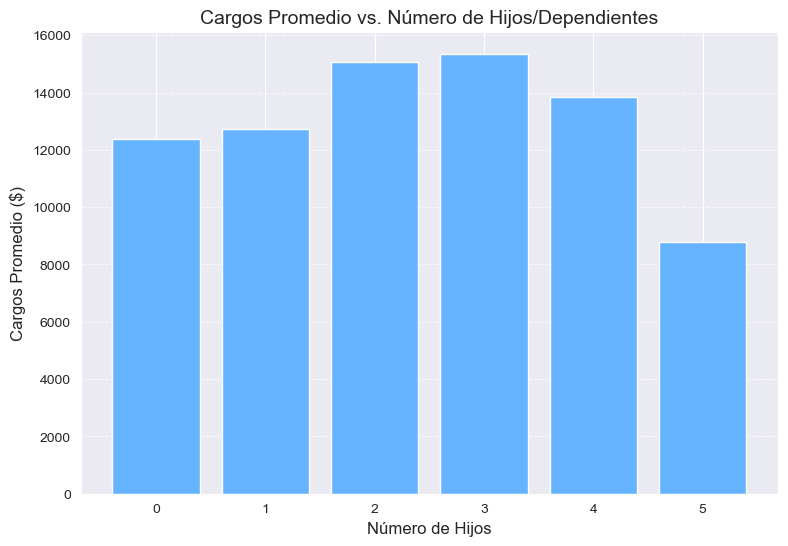

In [99]:
cargos_por_hijos = df.groupby('children')['charges'].mean().reset_index()
plt.figure(figsize=(9, 6))
plt.bar(cargos_por_hijos['children'], cargos_por_hijos['charges'], color='#66b3ff')

plt.title('Cargos Promedio vs. Número de Hijos/Dependientes', fontsize=14)
plt.xlabel('Número de Hijos', fontsize=12)
plt.ylabel('Cargos Promedio ($)', fontsize=12)
plt.xticks(cargos_por_hijos['children'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('../Visualizaciones/07_Cargos_vs_Número_Hijos_boxplot.png')
plt.show()

El número de hijos que tiene un individuo **si** tiene un efecto sobre los cargos a su seguro médico, sin embargo, hay que remarcar algunos puntos.

* Los individuos que tengan entre uno y tres hijos notaran un aumento en sus seguros medicos.
* A partir de que el individuo tenga un cuarto hijo, el seguro médico disminuira, pero probableménte no sea menor al coste base (sin hijos) de su seguro.
* Los cargos médicos de una persona con cinco hijos son sustancialmente menores a los posíbles cargos aplicables si no tubiera ningun hijo ese mismo individuo. Aunque no se conozca la causa, muy probablemente se deba a algún tipo de subsídio gubernamental, "promociones" proporcionadas por nosotros, sin embargo, vale la pena que la aseguradora investigue y documente las posibles causas.
---

# Conclusión Final: Estrategia de Segmentación de Riesgos

El análisis exploratorio de datos (EDA) ha identificado y cuantificado los factores clave para la estrategia de tarificación de seguros, demostrando que el riesgo es impulsado por la **interacción** de variables y no por factores aislados.

#### 1. El Riesgo Dominante y su Multiplicador
* **Tabaquismo:** Es el factor primario que establece la prima base en el rango más alto (costos 4 veces mayores que para no fumadores).
* **Interacción BMI:** La alta correlación ($R=0.81$) entre BMI y costos solo existe en la población fumadora. El **BMI actúa como un multiplicador** del riesgo que ya está establecido por el hábito de fumar.

#### 2. Justificación de Disparidades y Estrategia Regional
* La alta concentración de **fumadores y de BMI alto** en el **Sureste** justifica directamente sus mayores costos promedio y dispersión de riesgo.
* **Recomendación:** La aseguradora debe segmentar las tarifas regionales basándose en estos perfiles de riesgo demográfico.

#### 3. Hallazgo No Lineal (Número de Hijos)
* Se observó un aumento de costos con el primer y segundo hijo, como es previsible.
* Sin embargo, la notable **disminución de costos** para individuos con cuatro o cinco hijos (13,596 USD y 8,779 USD, respectivamente) sugiere fuertemente la intervención de **subsidios gubernamentales, políticas de promoción o descuentos por volumen**.
* **Recomendación de Negocio:** Este punto merece una investigación más profunda por parte del equipo de actuarios para verificar si estos subsidios o políticas son estables y afectan la rentabilidad.